In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, ttest_1samp, ttest_rel, ttest_ind
from statsmodels.stats import proportion as pr
import warnings
warnings.filterwarnings('ignore')

np.random.seed(123456789)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# load dataset
data = pd.read_csv("StudentsPerformance.csv")
print(f"shape: {data.shape}" )
print(data[['math score', 'reading score', 'writing score']])

shape: (1000, 8)
     math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]


In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
p_male = (data['gender']== 'male').mean()
p_female = (data['gender']== 'female').mean()

print(p_male, p_female)

0.482 0.518


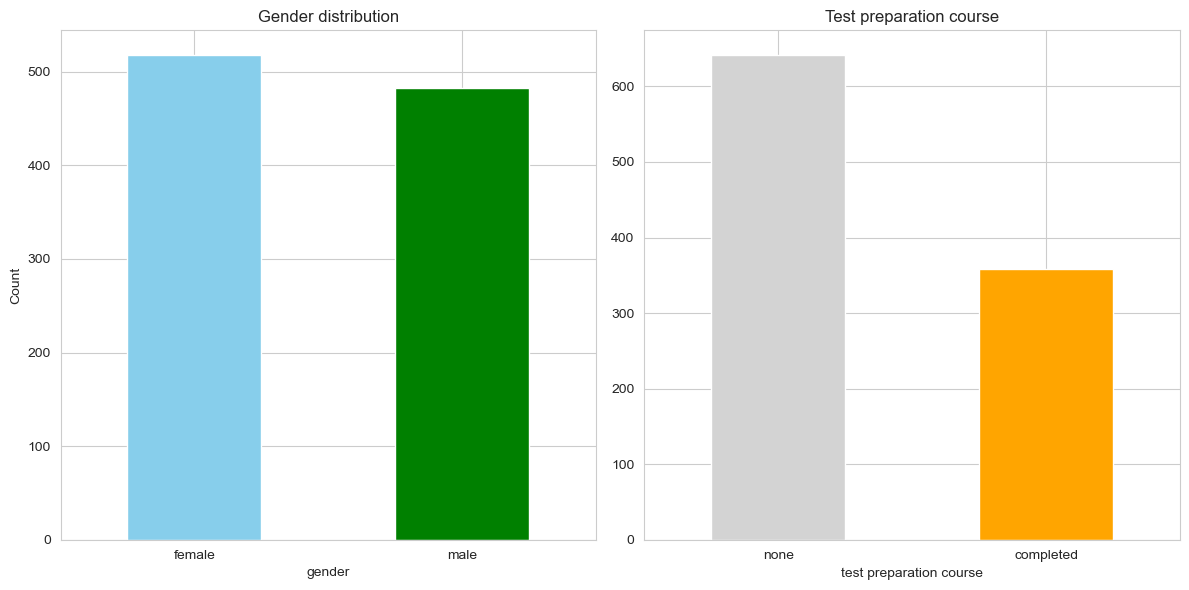

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['gender'].value_counts().plot(kind="bar", color=["skyblue", "green"])
plt.title("Gender distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
data['test preparation course'].value_counts().plot(kind="bar", color=["lightgray", "orange"])
plt.title("Test preparation course")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
# conditional probability

prep_completed = data[data['test preparation course'] == 'completed']
prep_none = data[data['test preparation course'] == 'none']

p_high_with_prep = (prep_completed['math score'] > 70).mean()
p_high_no_prep = (prep_none['math score'] > 70).mean()

In [11]:
print(f"P(Math > 70 | Prep Completed) = {p_high_with_prep:.3f}")
print(f"P(Math > 70 | No Prep ) = {p_high_no_prep:.3f}")

P(Math > 70 | Prep Completed) = 0.469
P(Math > 70 | No Prep ) = 0.347


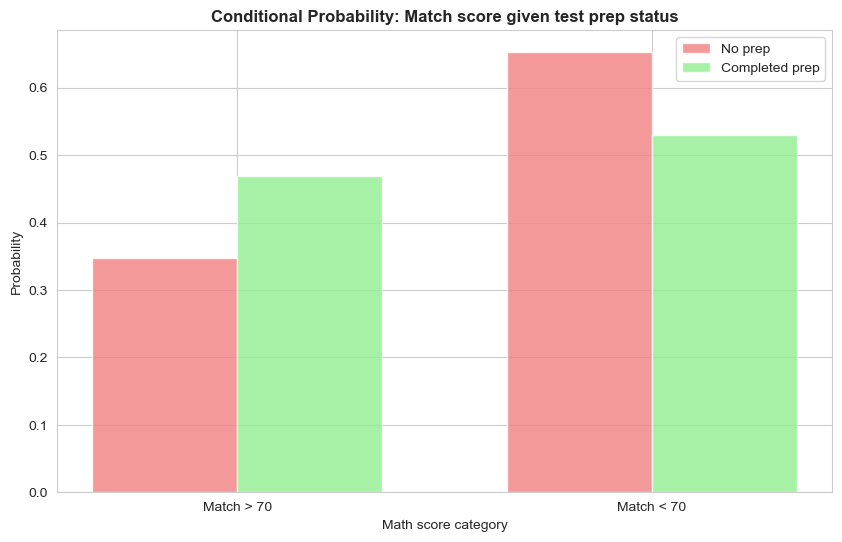

In [12]:
plt.figure(figsize = (10, 6))
categories = ["Match > 70", "Match < 70"]
prep_data = [p_high_with_prep, 1-p_high_with_prep]
no_prep_data = [p_high_no_prep, 1-p_high_no_prep]


x = np.arange(len(categories))
width = 0.35

plt.bar(x - width / 2, no_prep_data, width, label = "No prep", color="lightcoral", alpha = 0.8)
plt.bar(x + width / 2, prep_data, width, label = "Completed prep", color="lightgreen", alpha = 0.8)

plt.xlabel("Math score category")
plt.ylabel("Probability")
plt.title("Conditional Probability: Match score given test prep status", fontweight = "bold")
plt.xticks(x, categories)
plt.legend()
plt.show()

Mean:49.35 (Expected: 50)


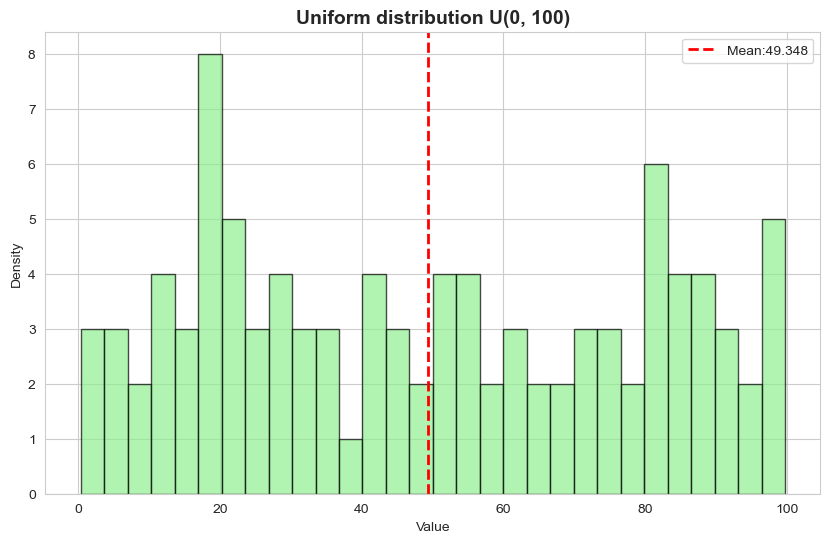

In [14]:
# probability distributions
uniform_samples = np.random.uniform(0, 100, 100)
print(f"Mean:{uniform_samples.mean():.2f} (Expected: 50)")
plt.figure(figsize = (10, 6))

plt.hist(uniform_samples, bins=30, density=False, alpha=0.7, color="lightgreen", edgecolor="black")
plt.axvline(uniform_samples.mean(), color="red", linestyle='--', linewidth=2, label=f'Mean:{uniform_samples.mean():.3f}')

plt.title("Uniform distribution U(0, 100)", fontsize=14, fontweight="bold")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

Mean: 66.09, Std: 15.16


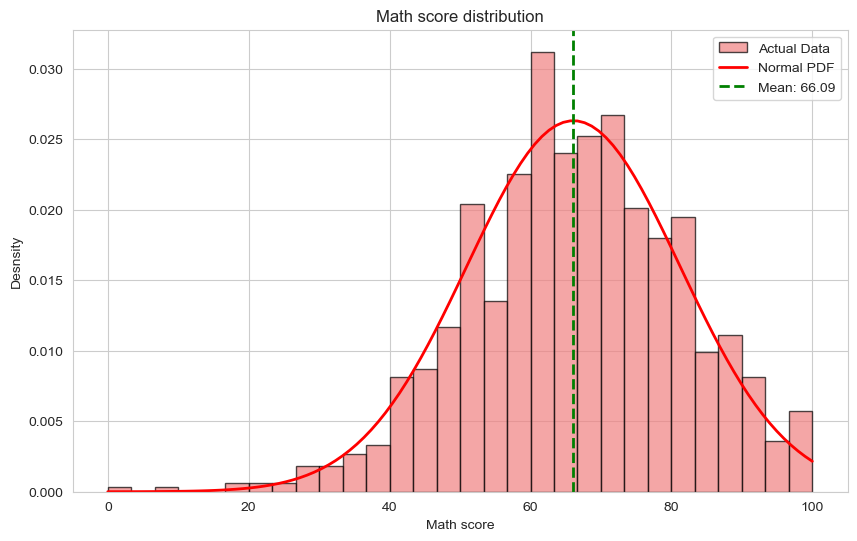

In [20]:
# normal distribution

math_mean = data['math score'].mean()
math_std = data['math score'].std()

print(f"Mean: {math_mean:.2f}, Std: {math_std:.2f}")

plt.figure(figsize=(10,6))
plt.hist(data['math score'], bins=30, density=True, alpha=0.7, color="lightcoral", edgecolor='black', label="Actual Data")

x_range = np.linspace(data['math score'].min(), data['math score'].max(), 100)
plt.plot(x_range, norm.pdf(x_range, math_mean, math_std), 'r-', linewidth=2, label='Normal PDF')
plt.axvline(math_mean, color='green', linestyle='--', linewidth=2, label=f"Mean: {math_mean:.2f}")
plt.title("Math score distribution")
plt.xlabel("Math score")
plt.ylabel("Desnsity")
plt.legend()
plt.show()

In [29]:
# Lab 5, continuation

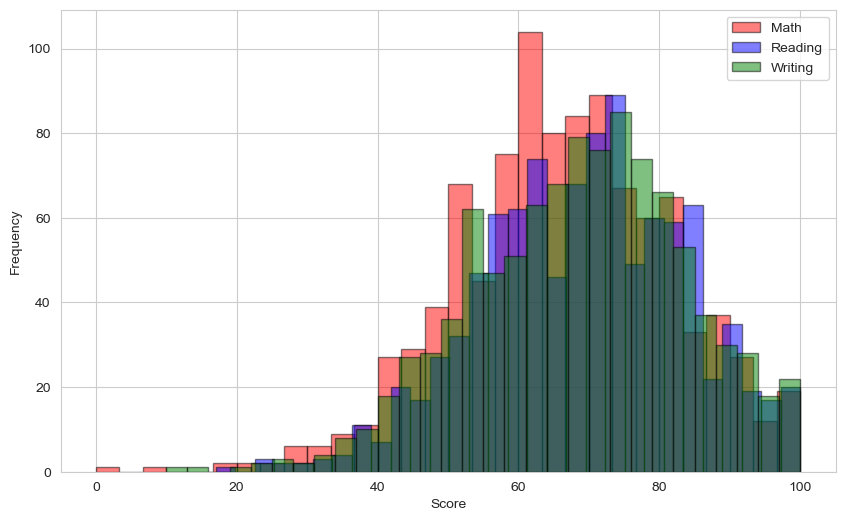

In [31]:
# compare all 3 subjects distributions
plt.figure(figsize = (10, 6))
plt.hist(data['math score'], bins = 30, alpha = 0.5, label = "Math", color = 'red', edgecolor = "black")
plt.hist(data['reading score'], bins = 30, alpha = 0.5, label = "Reading", color = 'blue', edgecolor = "black")
plt.hist(data['writing score'], bins = 30, alpha = 0.5, label = "Writing", color = 'green', edgecolor = "black")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [33]:
# Z-distribution (standarlization)

z_scores = (data["math score"] - data["math score"].mean())/ data['math score'].std()
z_scores

0      0.389828
1      0.191979
2      1.576922
3     -1.258913
4      0.653627
         ...   
995    1.445023
996   -0.269668
997   -0.467517
998    0.126030
999    0.719577
Name: math score, Length: 1000, dtype: float64

In [35]:
print(f"Z-scores - Mean: {z_scores.mean():.4f}, Std: {z_scores.std():.4f}")

Z-scores - Mean: 0.0000, Std: 1.0000


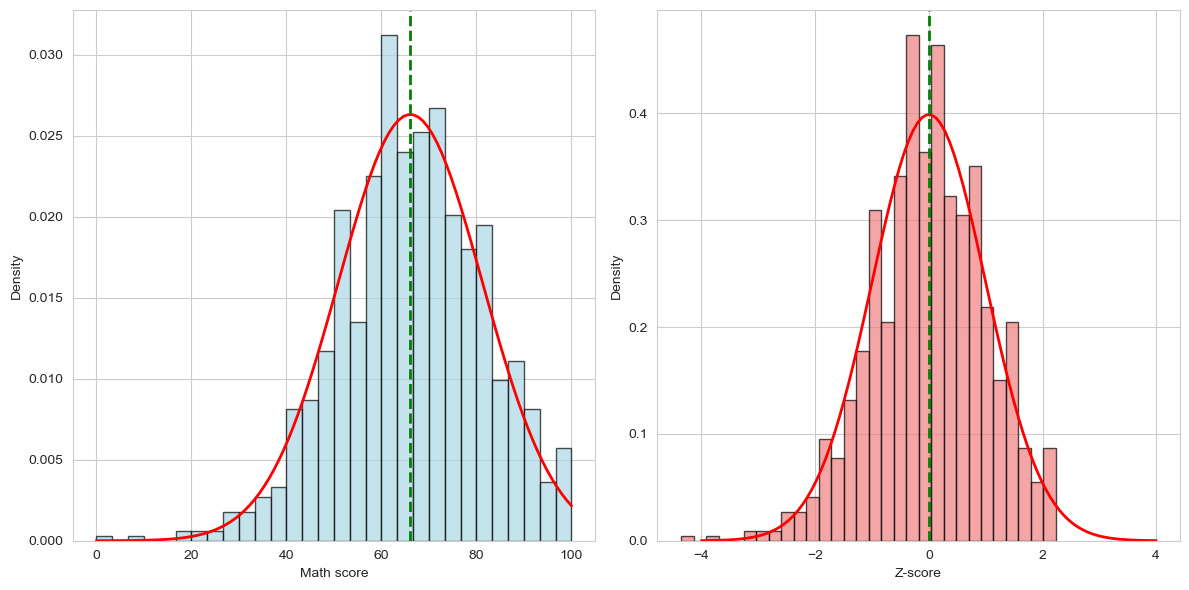

In [37]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.hist(data["math score"], bins=30, density=True, alpha=0.7, color="lightblue", edgecolor = "black")
x = np.linspace(data['math score'].min(), data['math score'].max(), 100)
plt.plot(x, norm.pdf(x, data['math score'].mean(), data["math score"].std()), 'r-', linewidth=2)
plt.axvline(data['math score'].mean(), color='green', linestyle='--', linewidth=2)
plt.xlabel("Math score")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
plt.hist(z_scores, bins=30, density=True, alpha=0.7, color="lightcoral", edgecolor = "black")
z = np.linspace(-4, 4, 100)
plt.plot(z, norm.pdf(z, 0, 1), '-r', linewidth=2)
plt.axvline(0, color='green', linestyle='--', linewidth=2)
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [50]:
# Z-test proportions

from statsmodels.stats.proportion import proportions_ztest
print("Question: Is test preparation completion rate different from 40%?")

n_total = len(data)
n_completed = (data['test preparation course'] == 'completed').sum()

p_hat = n_completed / n_total
# z_stat, p_value = pr.proportions_ztest(n_completed, n_total, 0.40, alternative="two_sided")
z_stat, p_value = proportions_ztest(count=n_completed, nobs=n_total, value=0.40, alternative="two-sided")


print(f"Sample proportions: {p_hat:.3f}")
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.3f}")

print(f"Result: {"Reject H0" if p_value < 0.05 else "Fails from Reject"} (alpha = 0.05)")



Question: Is test preparation completion rate different from 40%?
Sample proportions: 0.358
Z-statistic: -2.770
P-value: 0.006
Result: Reject H0 (alpha = 0.05)


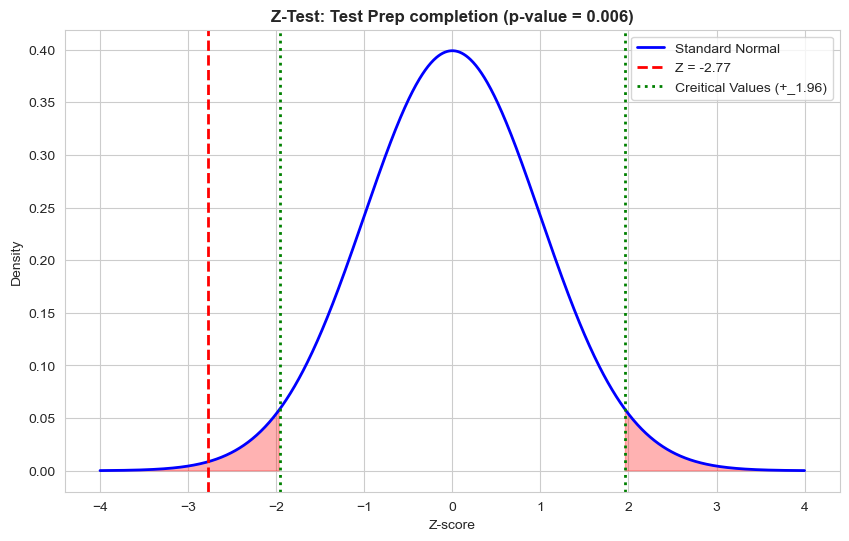

In [54]:

plt.figure(figsize=(10, 6))
z_range = np.linspace(-4, 4, 1000)
plt.plot(z_range, norm.pdf(z_range), '-b', linewidth=2, label="Standard Normal")
plt.axvline(z_stat, color='red', linestyle='--', linewidth=2, label=f'Z = {z_stat:.2f}')
plt.axvline(1.96, color='green', linestyle=':', linewidth=2, label="Creitical Values (+_1.96)")
plt.axvline(-1.96, color='green', linestyle=':', linewidth=2)
plt.fill_between(z_range, 0, norm.pdf(z_range), where=(z_range>=1.96) | (z_range <= -1.96), alpha=0.3, color='red')
plt.title(f"Z-Test: Test Prep completion (p-value = {p_value:.3f})", fontweight="bold")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.show()